# Titanic Classification

# Import Libraries, load and Analyse the datasets

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
titanic = pd.read_csv('train.csv') 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analysing the Null values

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull() #Look For null values in the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

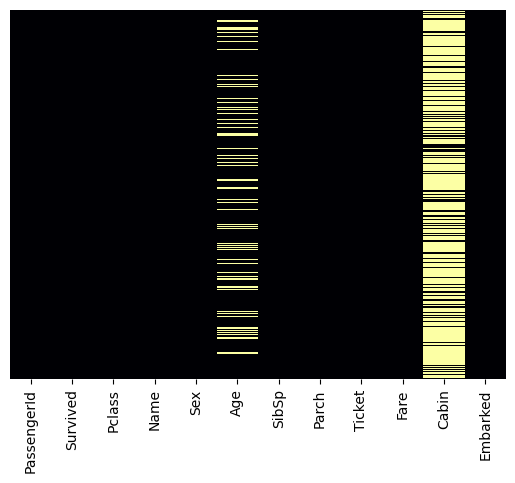

In [7]:
sns.heatmap(titanic.isnull(), cmap='inferno', cbar = False, yticklabels=False)

# Cleaning The Dataset

In [8]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)  #Fillinf missing values in age with their median

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic = titanic.drop(['Cabin'], axis=1) 
titanic = titanic.drop(['Ticket'], axis=1) 
#Drop colums which is of no need.
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [11]:
titanic = titanic.fillna({"Embarked": "S"})  
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Visualizing the data to get a better understanding

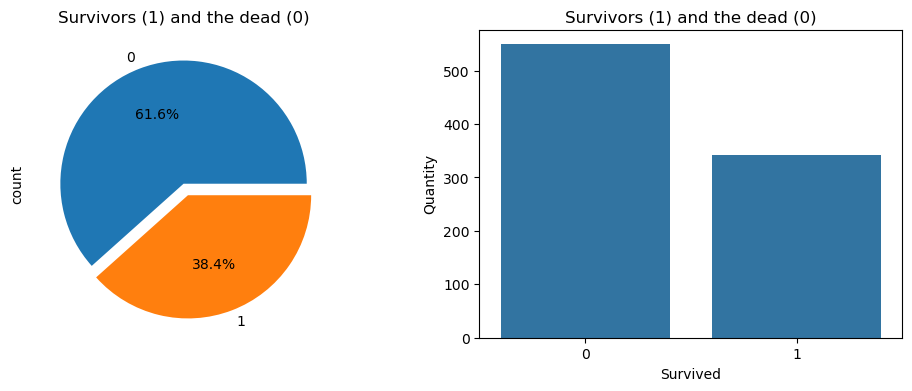

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0]) 
ax[0].set_title('Survivors (1) and the dead (0)') 

sns.countplot(x = 'Survived', data=titanic, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show()


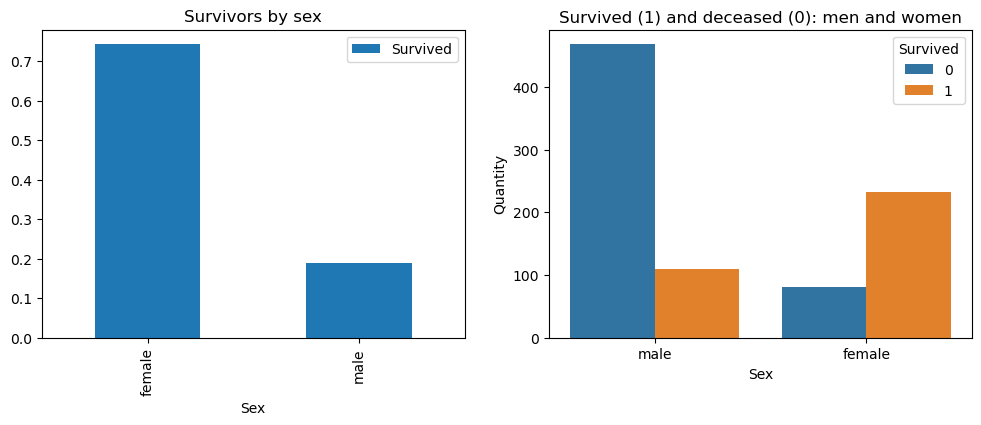

In [13]:
f, ax = plt.subplots(1,2,figsize=(12, 4)) 
titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 

sns.countplot(x = 'Sex', hue='Survived', data=titanic, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show()

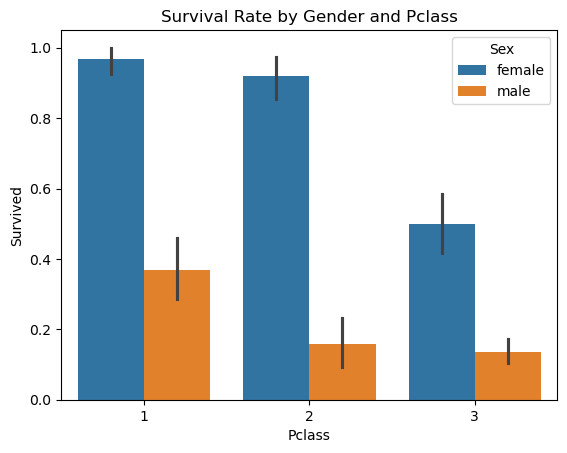

In [16]:
# Survival rate by Gender and Pclass
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Gender and Pclass')
plt.show()

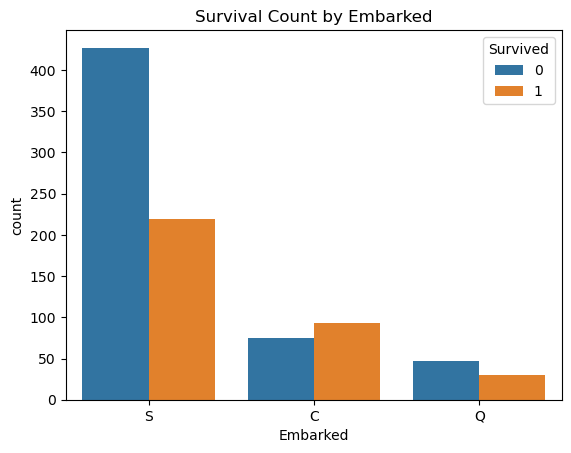

In [17]:
# Survival count by Embarked
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survival Count by Embarked')
plt.show()

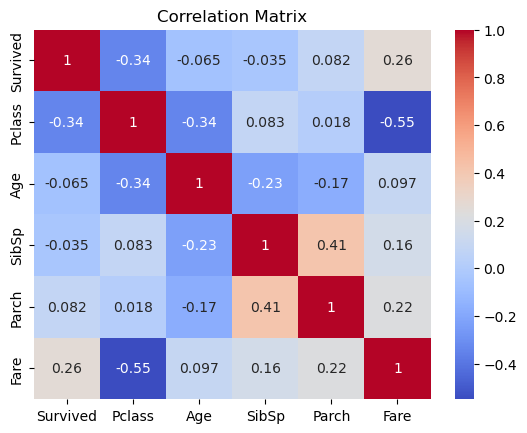

In [18]:
# Correlation heatmap for numerical variables
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_data = titanic[numerical_cols]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()